In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the Data

In [2]:
df = pd.read_csv("music_dataset_mod.csv")

In [3]:
df_music_realistic = df.copy()
df_music_realistic

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [4]:
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


## Data analysis

In [5]:
df_music_realistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

## Unique Genres

In [6]:
df_music_realistic['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

## Visualize the distribution

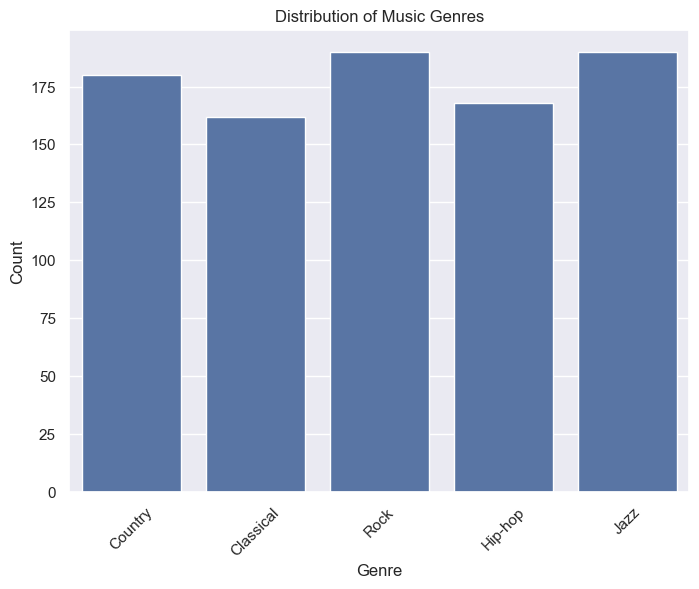

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df_music_realistic)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Preparing the Data

In [8]:
df_music_realistic_nonull = df_music_realistic.dropna()
df_music_realistic_nonull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


## Splitting features and target

In [9]:
X = df_music_realistic_nonull.drop(columns=['Genre'])
y = df_music_realistic_nonull['Genre']

## Encoding the target

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Updating the dataframe

In [11]:
df_with_encoded_genre = df_music_realistic_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded

## Correlation Matrix and Heatmap

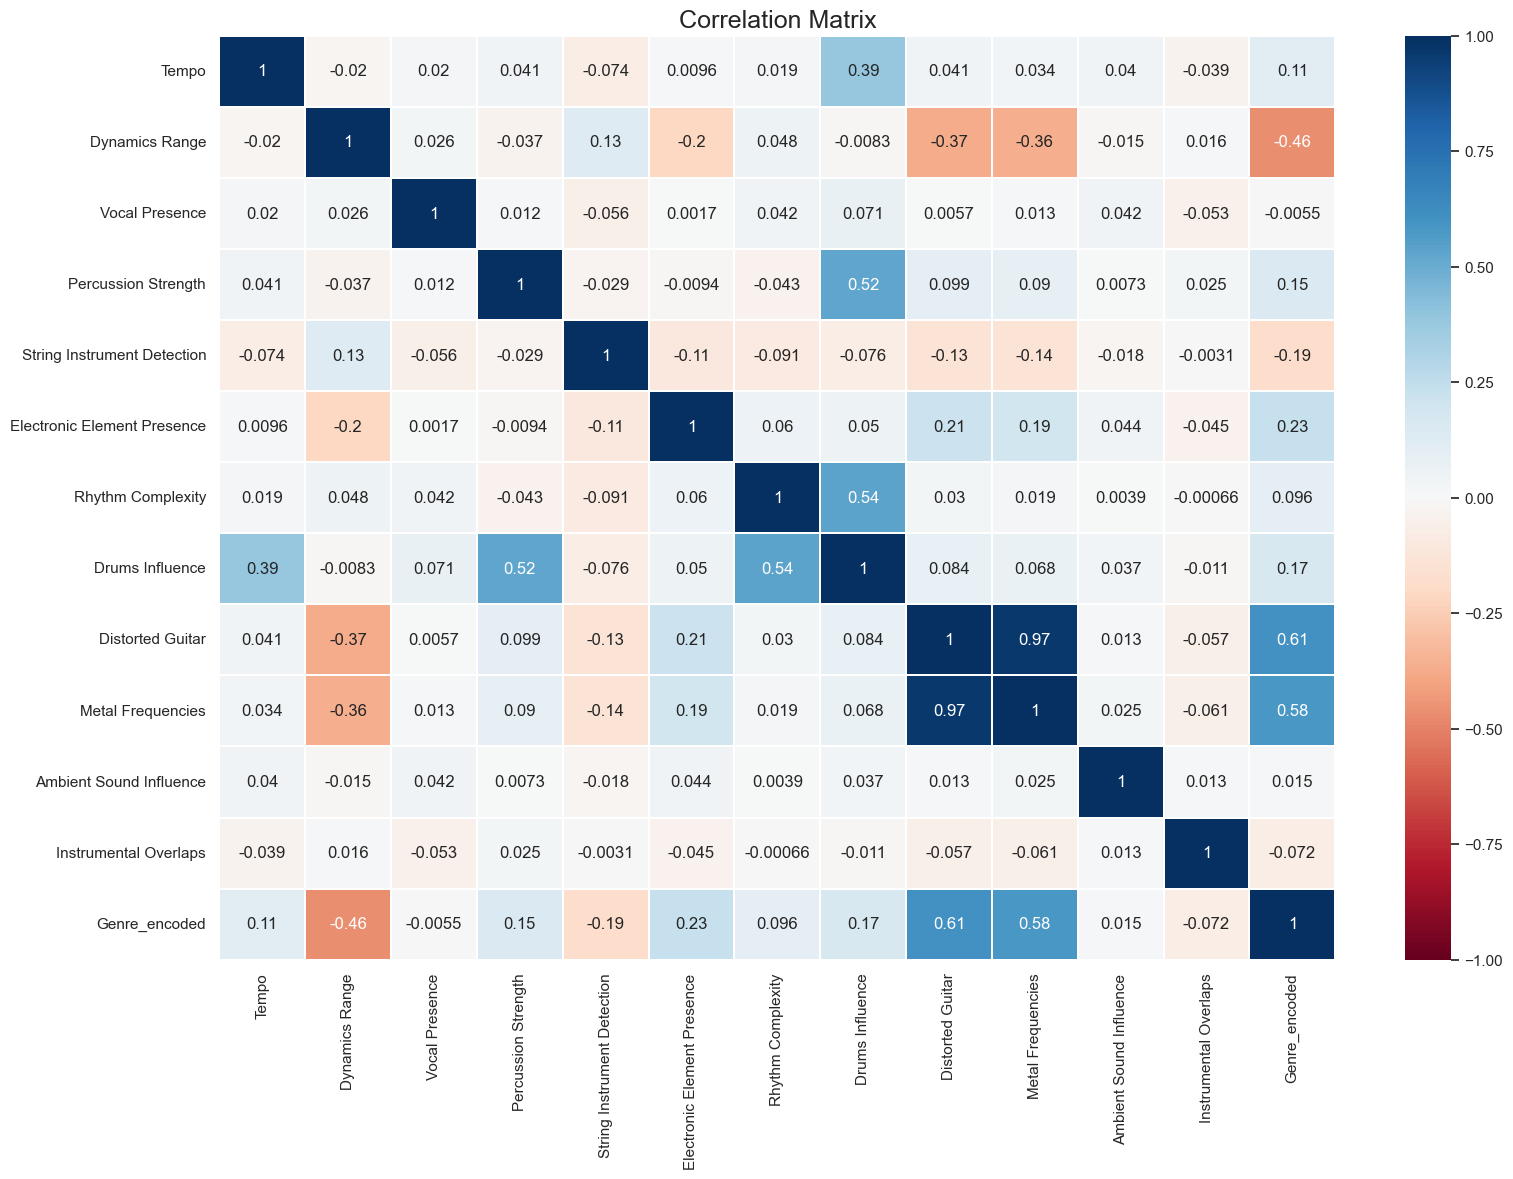

In [12]:
correlation_matrix = df_with_encoded_genre.corr()
plt.figure(figsize=(18, 12))

sns.heatmap(correlation_matrix,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap="RdBu",
            linewidths=0.1)
plt.title("Correlation Matrix", fontsize=18)
plt.yticks(rotation=0)

plt.show()

## Standardize the Data

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply PCA

In [14]:
pca = PCA()

In [15]:
X_pca = pca.fit_transform(X_scaled)

## Analyse variance

In [16]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


## Visualize Cumulative Variance

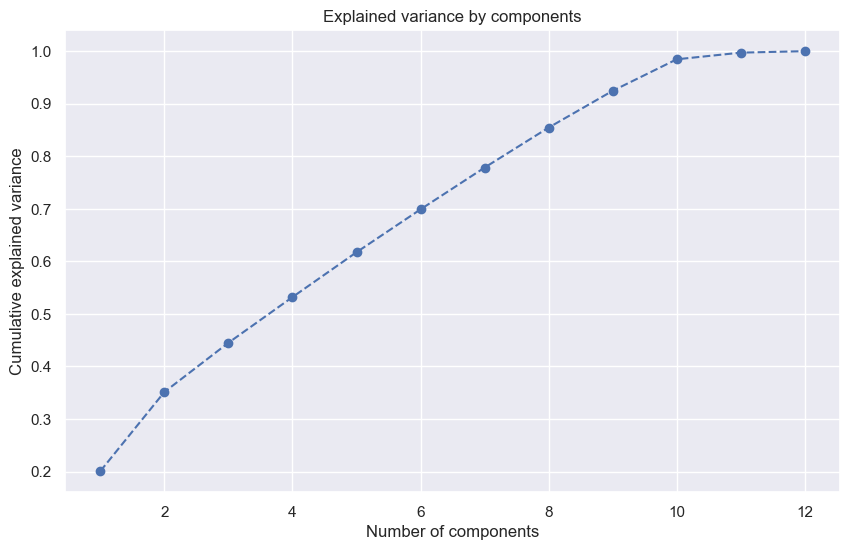

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [18]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

## Split Data for PCA Transformed Features

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

## Train the Classifier on PCA Data

In [20]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Model Prediction and Evaluation

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5355805243445693


In [23]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [24]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [25]:
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5318352059925093

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



# Genre Prediction

## Isolate Unknown Genre Data

In [26]:
df_unknown_genre = df_music_realistic[df_music_realistic['Genre'].isnull()]

## Prepare Data for Prediction

In [27]:
X_unknown = df_unknown_genre.drop(columns=['Genre'])

In [28]:
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

## Apply the Model for Prediction

In [29]:
y_unknown_pred = classifier.predict(X_unknown_pca)

## Transform Predictions to Original Labels

In [30]:
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

C:\Users\SANDY\AppData\Local\Temp\ipykernel_28536\3977239244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)


## Update the Original DataFrame

In [32]:
print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


In [33]:
df_unknown_genre.loc[992]

Tempo                          117.892313
Dynamics Range                  35.001524
Vocal Presence                  76.506358
Percussion Strength              77.97257
String Instrument Detection     80.765657
Electronic Element Presence     13.759213
Rhythm Complexity               59.985923
Drums Influence                 80.108786
Distorted Guitar                93.831262
Metal Frequencies                   100.0
Ambient Sound Influence         15.851851
Instrumental Overlaps           47.984445
Genre                                 NaN
Predicted_Genre                      Rock
Name: 992, dtype: object